In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.metrics import mean_squared_error


In [24]:
data1 = pd.read_csv("C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/data/TagsConseguidos/dataB_con_minutos_totales.csv")
data1

,ID del juego,Géneros,Categorías,Fecha de Lanzamiento,Multiplayer,Cantidad de descargas,Precio,In-Purchased,Minutos jugadas,Fecha,Dias_Pasados,Minutos jugadas Totales
0,850170,"Action, Strategy, Free to Play","Single-player, Multi-player, Co-op, Online Co-...","{'date': '15 Aug, 2023'}",1.0,755,0,1,NaN,15/08/2023 00:00,237,942
1,866510,"Adventure, Casual, Indie","Single-player, Multi-player, Steam Achievement...","{'date': '6 Jun, 2018'}",1.0,7,199,1,NaN,06/06/2018 00:00,2133,765
2,820030,"Adventure, Casual, Indie","Single-player, Steam Achievements, Steam Tradi...","{'date': '19 Jun, 2018'}",0.0,7,499,1,NaN,19/06/2018 00:00,2120,769
3,967250,"Action, Adventure, Casual, Indie, RPG, Simulation","Single-player, Steam Achievements, Steam Tradi...","{'date': '5 Nov, 2018'}",0.0,0,99,0,NaN,05/11/2018 00:00,1981,10088
4,703880,"Action, Indie, Strategy","Single-player, Multi-player, PvP, Shared/Split...","{'date': '6 Nov, 2018'}",1.0,0,999,0,NaN,06/11/2018 00:00,1980,1664
...,...,...,...,...,...,...,...,...,...,...,...,...
4284,329340,"Action, Indie","Single-player, Steam Achievements, Steam Tradi...",NaN,0.0,0,599,0,NaN,-1,708,4
4285,329770,"Action, Indie, RPG","Single-player, VR Supported, Steam Trading Car...",NaN,0.0,0,599,0,NaN,-1,708,189
4286,329860,"Action, Casual, Indie, Simulation","Single-player, Steam Achievements, Full contro...",NaN,0.0,0,999,0,NaN,-1,708,835
4287,330180,"Action, Indie","Single-player, Multi-player, Steam Achievement...",NaN,1.0,0,499,0,NaN,-1,708,529


In [25]:
data1.head(10)

,ID del juego,Géneros,Categorías,Fecha de Lanzamiento,Multiplayer,Cantidad de descargas,Precio,In-Purchased,Minutos jugadas,Fecha,Dias_Pasados,Minutos jugadas Totales
0,850170,"Action, Strategy, Free to Play","Single-player, Multi-player, Co-op, Online Co-...","{'date': '15 Aug, 2023'}",1.0,755,0,1,NaN,15/08/2023 00:00,237,942
1,866510,"Adventure, Casual, Indie","Single-player, Multi-player, Steam Achievement...","{'date': '6 Jun, 2018'}",1.0,7,199,1,NaN,06/06/2018 00:00,2133,765
2,820030,"Adventure, Casual, Indie","Single-player, Steam Achievements, Steam Tradi...","{'date': '19 Jun, 2018'}",0.0,7,499,1,NaN,19/06/2018 00:00,2120,769
3,967250,"Action, Adventure, Casual, Indie, RPG, Simulation","Single-player, Steam Achievements, Steam Tradi...","{'date': '5 Nov, 2018'}",0.0,0,99,0,NaN,05/11/2018 00:00,1981,10088
4,703880,"Action, Indie, Strategy","Single-player, Multi-player, PvP, Shared/Split...","{'date': '6 Nov, 2018'}",1.0,0,999,0,NaN,06/11/2018 00:00,1980,1664
5,994910,"Casual, Massively Multiplayer, Simulation, Str...","Multi-player, PvP, Online PvP, Co-op, Online C...","{'date': '23 Sep, 2020'}",1.0,116,0,1,NaN,23/09/2020 00:00,1293,1
6,1013320,"Action, Adventure, Casual, Indie, Massively Mu...","Single-player, Multi-player, MMO, PvP, Online ...","{'date': '26 Sep, 2019'}",1.0,2182,0,1,NaN,26/09/2019 00:00,1656,101992
7,500710,"Action, Adventure, Free to Play, Indie, Massiv...","Multi-player, MMO, Co-op, Cross-Platform Multi...","{'date': '18 Dec, 2017'}",1.0,14,0,1,NaN,18/12/2017 00:00,2303,2370
8,1098340,"Casual, Indie","Single-player, Steam Achievements, Steam Tradi...","{'date': '24 Jun, 2019'}",0.0,2,199,0,NaN,24/06/2019 00:00,1750,3460
9,1015500,"Simulation, Sports","Single-player, Multi-player, Co-op, Shared/Spl...","{'date': '21 Oct, 2019'}",1.0,14,0,0,NaN,21/10/2019 00:00,1631,2887


In [3]:
var_dp = ['Cantidad de descargas', 'Minutos jugadas Totales', 'Dias_Pasados']
var_x = data1[var_dp]
var_x

,Cantidad de descargas,Minutos jugadas Totales,Dias_Pasados
0,755,942,237
1,7,765,2133
2,7,769,2120
3,0,10088,1981
4,0,1664,1980
...,...,...,...
4284,0,4,708
4285,0,189,708
4286,0,835,708
4287,0,529,708


In [4]:
var_indp = ['In-Purchased']
var_y = data1[var_indp]
var_y

,In-Purchased
0,1
1,1
2,1
3,0
4,0
...,...
4284,0
4285,0
4286,0
4287,0


In [18]:
var_dpindp = ['Cantidad de descargas', 'Minutos jugadas Totales', 'Dias_Pasados','In-Purchased']
var_z = data1[var_dpindp]
var_z

,Cantidad de descargas,Minutos jugadas Totales,Dias_Pasados,In-Purchased
0,755,942,237,1
1,7,765,2133,1
2,7,769,2120,1
3,0,10088,1981,0
4,0,1664,1980,0
...,...,...,...,...
4284,0,4,708,0
4285,0,189,708,0
4286,0,835,708,0
4287,0,529,708,0


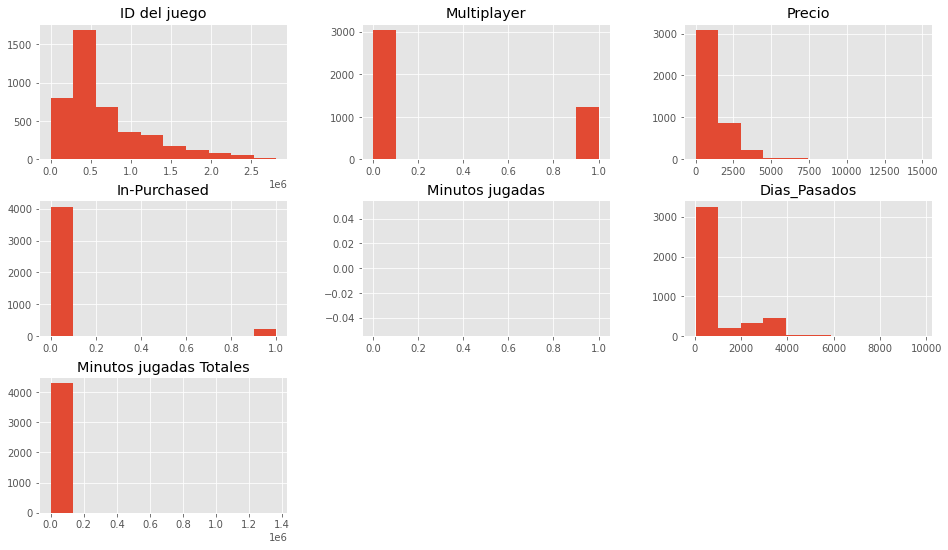

In [5]:
data1.hist()
plt.show()

In [6]:
print(data1.groupby('In-Purchased').size())

In-Purchased
0    4067
1     222
dtype: int64


In [7]:
print(data1.groupby('Minutos jugadas Totales').size())

Minutos jugadas Totales
1          97
2          34
3          32
4          21
5          13
           ..
186355      1
193948      1
216893      1
237354      1
1363641     1
Length: 2107, dtype: int64


c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


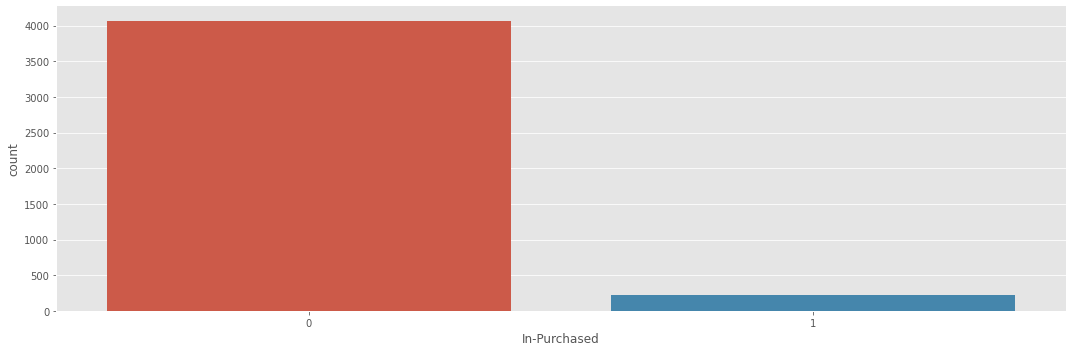

In [8]:
sb.factorplot('In-Purchased',data=data1,kind="count", aspect=3)

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


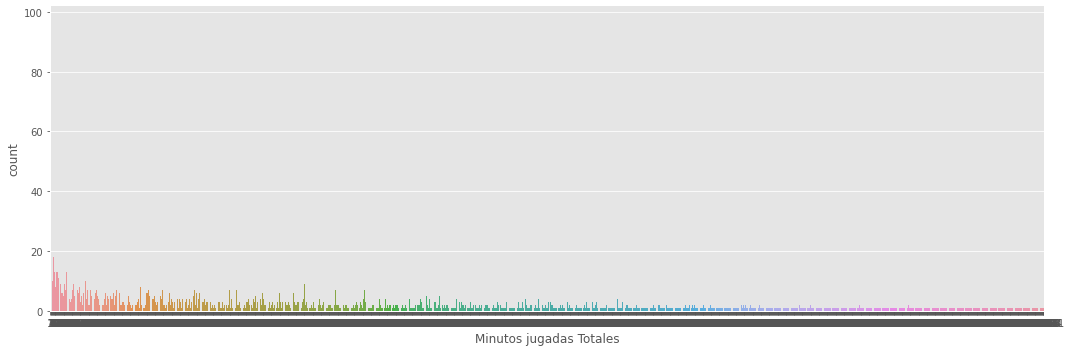

In [9]:
sb.factorplot('Minutos jugadas Totales',data=data1,kind="count", aspect=3)

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


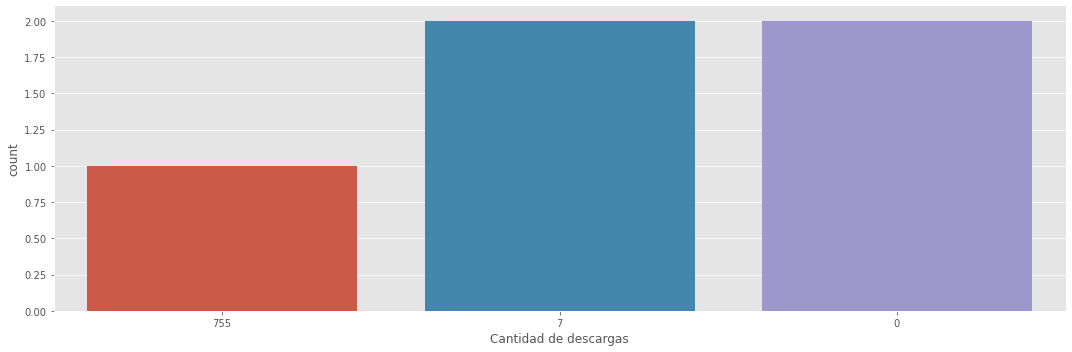

In [10]:
sb.catplot('Cantidad de descargas',data=data1.head(),kind="count", aspect=3)

In [11]:
# Convertir la columna de cadena a tipo entero
data1['Cantidad de descargas'] = pd.to_numeric(data1['Cantidad de descargas'], errors='coerce').astype('Int64')
data1['Cantidad de descargas'] = data1['Cantidad de descargas'].fillna(0)


In [12]:
data1.dtypes

ID del juego                 int64
Géneros                     object
Categorías                  object
Fecha de Lanzamiento        object
Multiplayer                float64
Cantidad de descargas        Int64
Precio                       int64
In-Purchased                 int64
Minutos jugadas            float64
Fecha                       object
Dias_Pasados                 int64
Minutos jugadas Totales      int64
dtype: object

In [13]:
# 1. Cargar los datos desde el CSV
#data = pd.read_csv('tu_archivo.csv')

# Seleccionar las columnas de interés
X = data1[['Cantidad de descargas','Minutos jugadas Totales','Dias_Pasados','Precio']]
y = data1['In-Purchased']  # Supongamos que 'Target' es la columna que representa la variable objetivo

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalar las características (opcional pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Inicializar los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# 5. Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# 6. Mostrar los resultados
for name, accuracy in results.items():
    print(f'{name}: Accuracy = {accuracy}')
    
from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)


Logistic Regression: Accuracy = 0.9347319347319347
Decision Tree: Accuracy = 0.9289044289044289
Random Forest: Accuracy = 0.9393939393939394
SVM: Accuracy = 0.9393939393939394
Error cuadrático medio (MSE): 0.06060606060606061


In [20]:

# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = data1[['Cantidad de descargas','Minutos jugadas Totales','Dias_Pasados','Precio']]
y = data1['In-Purchased'] 

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred)

# Imprimir los resultados
print("Logistic Regression: Accuracy =", accuracy_log_reg)
print("Decision Tree: Accuracy =", accuracy_decision_tree)
print("Random Forest: Accuracy =", accuracy_random_forest)
print("SVM: Accuracy =", accuracy_svm)
print("Error cuadrático medio (MSE):", mse)


Logistic Regression: Accuracy = 0.9347319347319347
Decision Tree: Accuracy = 0.9277389277389277
Random Forest: Accuracy = 0.9370629370629371
SVM: Accuracy = 0.9358974358974359
Error cuadrático medio (MSE): 0.06060606060606061


In [15]:
from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 0.06060606060606061


In [16]:
# Definir una función para evaluar los modelos usando validación cruzada
def evaluar_modelo(modelo, X, y):
    scores = cross_val_score(modelo, X, y, cv=5)
    return scores.mean(), scores.std()

# Comparar los modelos
resultados = {}
for nombre, modelo in models.items():
    media, desviacion = evaluar_modelo(modelo, X, y)
    resultados[nombre] = (media, desviacion)

mejor_modelo = max(resultados, key=lambda k: resultados[k][0])
print("El mejor modelo es:", mejor_modelo)

# Imprimir los resultados
for nombre, (media, desviacion) in resultados.items():
    print(f"{nombre}: Accuracy medio = {media}, Desviación estándar = {desviacion}")

# Interpretar los resultados
# Analiza los resultados y toma una decisión sobre qué modelo es el mejor en función de las métricas y tus objetivos específicos.


El mejor modelo es: Logistic Regression
Logistic Regression: Accuracy medio = 0.9487059809113484, Desviación estándar = 0.001648441338704036
Decision Tree: Accuracy medio = 0.9319216761457134, Desviación estándar = 0.01010748946338958
Random Forest: Accuracy medio = 0.9428771151058198, Desviación estándar = 0.0055652556241434425
SVM: Accuracy medio = 0.948239780445148, Desviación estándar = 0.0005616301555068673


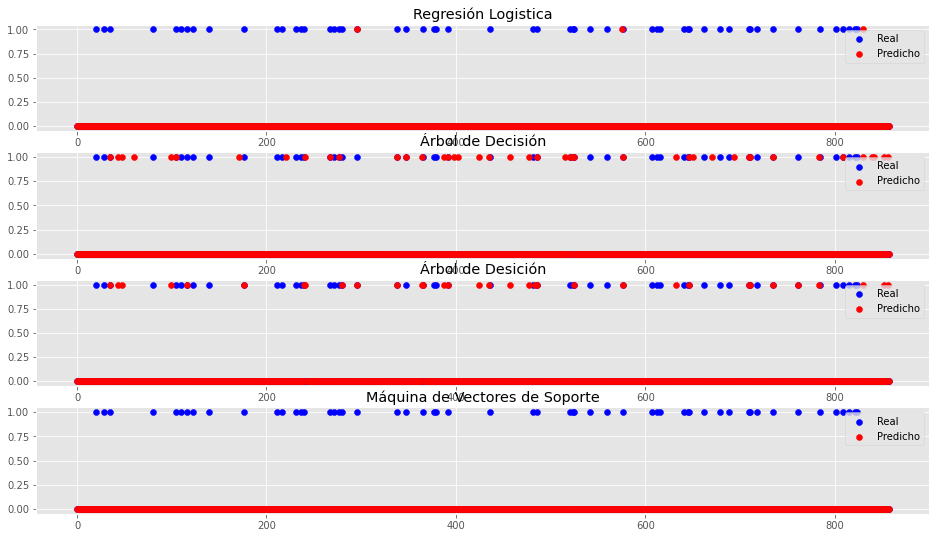

In [19]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(4)

# Crear un rango de valores para el eje x
x_range = range(len(y_test))

# Graficar los resultados reales vs. las predicciones para cada modelo
axs[0].scatter(x_range, y_test, color='blue', label='Real')
axs[0].scatter(x_range, y_pred_log_reg, color='red', label='Predicho')
axs[0].set_title('Regresión Logistica')

axs[1].scatter(x_range, y_test, color='blue', label='Real')
axs[1].scatter(x_range, y_pred_decision_tree, color='red', label='Predicho')
axs[1].set_title('Árbol de Decisión')

axs[2].scatter(x_range, y_test, color='blue', label='Real')
axs[2].scatter(x_range, y_pred_random_forest, color='red', label='Predicho')
axs[2].set_title('Árbol de Desición')

axs[3].scatter(x_range, y_test, color='blue', label='Real')
axs[3].scatter(x_range, y_pred_svm, color='red', label='Predicho')
axs[3].set_title('Máquina de Vectores de Soporte')

# Añadir una leyenda a cada subtrama
for ax in axs:
    ax.legend()

# Mostrar la figura
plt.show()


In [23]:
df_csv = pd.read_csv("C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/data/Principal/respuestas_A_modificado.csv")
df_data = ['ID del jugador', 'ID del juego', 'Nombre del juego', 'Minutos jugadas', 'Géneros', 'Categorías']
data_jugadores = df_csv[df_data]
data_jugadores

,ID del jugador,ID del juego,Nombre del juego,Minutos jugadas,Géneros,Categorías
0,76561198276551837,461640,Sins Of The Demon RPG,1,"Action, Adventure, Indie, RPG","Single-player, Steam Achievements, Full contro..."
1,76561198276551837,730,Counter-Strike 2,23,"Action, Free to Play","Multi-player, Cross-Platform Multiplayer, Stea..."
2,76561198276551837,578080,PUBG: BATTLEGROUNDS,6,"Action, Adventure, Massively Multiplayer, Free...","Multi-player, PvP, Online PvP, Stats, Remote P..."
3,76561198276551837,570,Dota 2,144250,"Action, Strategy, Free to Play","Multi-player, Co-op, Steam Trading Cards, Stea..."
4,76561198162346285,42690,Call of Duty®: Modern Warfare® 3 (2011) - Mult...,174,NaN,NaN
...,...,...,...,...,...,...
158107,76561199072870965,871720,Ultimate Custom Night,75,"Action, Free to Play, Indie","Single-player, Remote Play on Phone, Remote Pl..."
158108,76561199072870965,730,Counter-Strike 2,32894,"Action, Free to Play","Multi-player, Cross-Platform Multiplayer, Stea..."
158109,76561199072870965,945360,Among Us,396,Casual,"Multi-player, PvP, Online PvP, LAN PvP, Co-op,..."
158110,76561199072870965,1281930,tModLoader,487,"Action, Adventure, Indie, RPG, Free to Play","Single-player, Multi-player, PvP, Online PvP, ..."
